In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from pandas import DataFrame
import numpy as np
import xlrd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [2]:
mlb = pd.read_excel('mlb-player-stats-P-2018.xlsx', engine='openpyxl') 
#might have to change this to your path ^ 

In [3]:
mlb

,Player,Team,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Jhoulys Chacin,MIL,35,35,0,0,192.2,153,75,156,71,18,15,8,0,0,0,3.50,1.16
1,Dallas Keuchel,HOU,34,34,1,0,204.2,211,85,153,58,18,12,11,0,0,0,3.74,1.31
2,Justin Verlander,HOU,34,34,1,1,214.0,156,60,290,37,28,16,9,0,0,0,2.52,0.90
3,James Shields,CWS,34,33,0,0,204.2,190,103,154,78,34,7,16,0,0,0,4.53,1.31
4,Kyle Freeland,COL,33,33,0,0,202.1,182,64,173,70,17,17,7,0,0,0,2.85,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,Josh Smoker,DET,1,0,0,0,1.2,0,0,2,2,0,0,0,0,0,0,0.00,1.20
837,Ian Krol,LAA,1,0,0,0,2.0,1,0,2,1,0,0,0,0,0,0,0.00,1.00
838,Scott Copeland,NYM,1,0,0,0,1.1,1,0,2,0,0,0,0,0,0,0,0.00,0.75
839,George Kontos,NYY,1,0,0,0,1.2,1,0,2,0,0,0,0,0,0,0,0.00,0.60


# Data Wrangling

In [4]:
mlb = DataFrame(mlb,columns=['Player','Team','G','GS','CG','SHO','IP','H','ER','K','BB','HR','W','L','SV','BS','HLD','ERA', 'WHIP'])


In [5]:
mlb

,Player,Team,G,GS,CG,SHO,IP,H,ER,K,BB,HR,W,L,SV,BS,HLD,ERA,WHIP
0,Jhoulys Chacin,MIL,35,35,0,0,192.2,153,75,156,71,18,15,8,0,0,0,3.50,1.16
1,Dallas Keuchel,HOU,34,34,1,0,204.2,211,85,153,58,18,12,11,0,0,0,3.74,1.31
2,Justin Verlander,HOU,34,34,1,1,214.0,156,60,290,37,28,16,9,0,0,0,2.52,0.90
3,James Shields,CWS,34,33,0,0,204.2,190,103,154,78,34,7,16,0,0,0,4.53,1.31
4,Kyle Freeland,COL,33,33,0,0,202.1,182,64,173,70,17,17,7,0,0,0,2.85,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,Josh Smoker,DET,1,0,0,0,1.2,0,0,2,2,0,0,0,0,0,0,0.00,1.20
837,Ian Krol,LAA,1,0,0,0,2.0,1,0,2,1,0,0,0,0,0,0,0.00,1.00
838,Scott Copeland,NYM,1,0,0,0,1.1,1,0,2,0,0,0,0,0,0,0,0.00,0.75
839,George Kontos,NYY,1,0,0,0,1.2,1,0,2,0,0,0,0,0,0,0,0.00,0.60


In [6]:
mlb = mlb.drop([150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840])
mlb = mlb.drop(mlb.columns[[2, 4, 5, 14, 15, 16]], axis=1)

In [7]:
list(mlb)

['Player',
 'Team',
 'GS',
 'IP',
 'H',
 'ER',
 'K',
 'BB',
 'HR',
 'W',
 'L',
 'ERA',
 'WHIP']

In [8]:
mlb.head()

,Player,Team,GS,IP,H,ER,K,BB,HR,W,L,ERA,WHIP
0,Jhoulys Chacin,MIL,35,192.2,153,75,156,71,18,15,8,3.50,1.16
1,Dallas Keuchel,HOU,34,204.2,211,85,153,58,18,12,11,3.74,1.31
2,Justin Verlander,HOU,34,214.0,156,60,290,37,28,16,9,2.52,0.90
3,James Shields,CWS,33,204.2,190,103,154,78,34,7,16,4.53,1.31
4,Kyle Freeland,COL,33,202.1,182,64,173,70,17,17,7,2.85,1.25


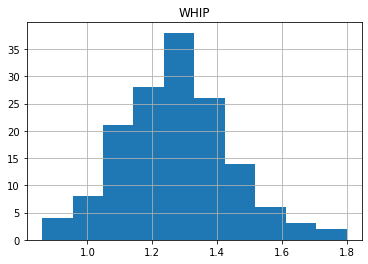

In [9]:
r_ = mlb.hist("WHIP")

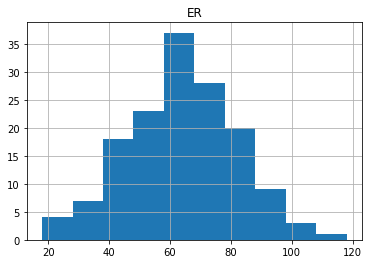

In [10]:
#histogram of ER
r_ = mlb.hist("ER")


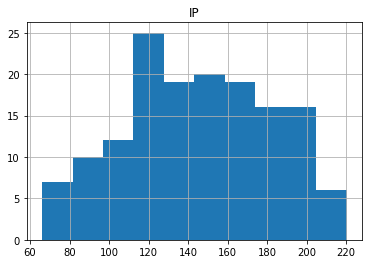

In [11]:
r_ = mlb.hist("IP")

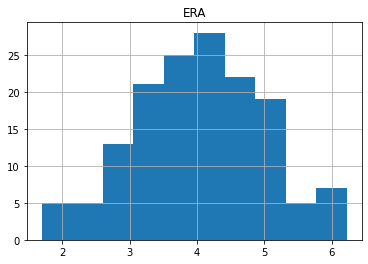

In [12]:
r_ = mlb.hist("ERA")

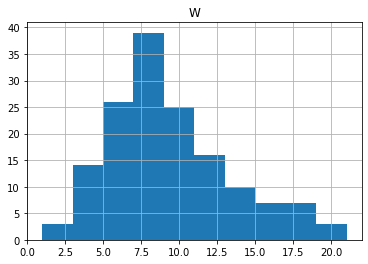

In [13]:
r_ = mlb.hist("W")

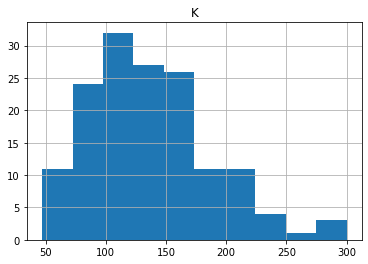

In [14]:
r_ = mlb.hist("K")

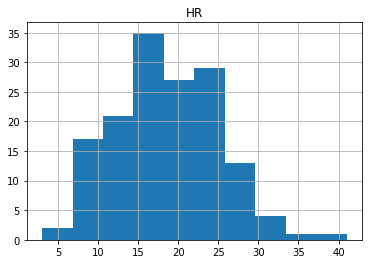

In [15]:
r_ = mlb.hist("HR")

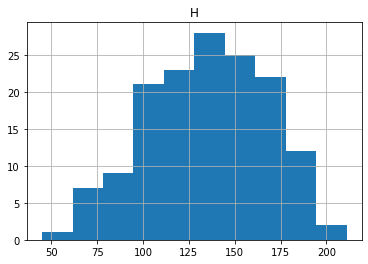

In [16]:
r_ = mlb.hist("H")

In [17]:
mlb = pd.get_dummies(mlb, columns=['Team'])

In [18]:
mlb = pd.get_dummies(mlb, columns=['Player'])

# Cluster Analysis

In [19]:
mlb.head()

,GS,IP,H,ER,K,BB,HR,W,L,ERA,...,Player_Vince Velasquez,Player_Wade LeBlanc,Player_Wade Miley,Player_Walker Buehler,Player_Wei-Yin Chen,Player_Yovani Gallardo,Player_Zach Eflin,Player_Zack Godley,Player_Zack Greinke,Player_Zack Wheeler
0,35,192.2,153,75,156,71,18,15,8,3.50,...,0,0,0,0,0,0,0,0,0,0
1,34,204.2,211,85,153,58,18,12,11,3.74,...,0,0,0,0,0,0,0,0,0,0
2,34,214.0,156,60,290,37,28,16,9,2.52,...,0,0,0,0,0,0,0,0,0,0
3,33,204.2,190,103,154,78,34,7,16,4.53,...,0,0,0,0,0,0,0,0,0,0
4,33,202.1,182,64,173,70,17,17,7,2.85,...,0,0,0,0,0,0,0,0,0,0


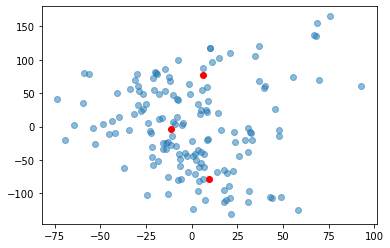

In [20]:
pca = PCA(n_components=2)
projection = pca.fit_transform(mlb[:150])
kmeans = KMeans(n_clusters = 3).fit(projection)   
clusters = kmeans.cluster_centers_
plt.scatter(projection[:,1],projection[:,0], alpha = .5);
plt.scatter(clusters[:,1],clusters[:,0],  color="r");

# Regression

In [21]:
inputs_regression = mlb[['ER','IP']]
targets_regression = mlb[['ERA']]
targets_regression.columns = ['Actual ERA']

In [22]:
regression_model = linear_model.Ridge().fit(inputs_regression,targets_regression)

In [23]:
regression_predictions = pd.DataFrame(regression_model.predict(inputs_regression))
regression_predictions.columns = ["Predicted ERA"]

In [24]:
np.sqrt(mean_squared_error(regression_predictions, targets_regression))

0.25423253604695883

In [25]:
pd.concat([regression_predictions,targets_regression], axis=1).head(150)

,Predicted ERA,Actual ERA
0,3.512955,3.50
1,3.802566,3.74
2,2.085259,2.52
3,4.862933,4.53
4,2.617881,2.85
...,...,...
145,5.243274,6.22
146,4.586742,5.21
147,4.472927,4.92
148,3.559862,3.20


Text(0.5, 0, 'ERA')

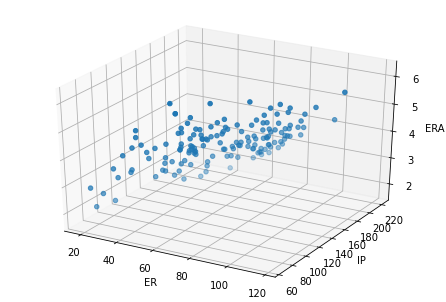

In [26]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inputs_regression["ER"],inputs_regression["IP"],
np.ravel(mlb["ERA"]))
ax.set_xlabel('ER')
ax.set_ylabel('IP')
ax.set_zlabel('ERA')